# **Differentiation Infrastructure in Deepchem**

Author : Rakshit Kr. Singh : [Website](https://greatrsingh.in/) : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [GitHub](https://github.com/GreatRSingh)

Scientific advancement in machine learning hinges on the effective resolution of complex optimization problems. From material property design to drug discovery, these problems often involve numerous variables and intricate relationships. Traditional optimization techniques often face hurdles when addressing such challenges, often resulting in slow convergence or solutions deemed unreliable. We introduce solutions that are differentiable and also seamlessly integrable into machine learning systems, offering a novel approach to resolving these complexities.

This tutorials introduces DeepChem's comprehensive set of differentiable optimisation tools to empower researchers across the physical sciences. DeepChem addresses limitations of conventional methods by offering a diverse set of optimization algorithms. These includes established techniques like Broyden's first and second methods alongside cutting-edge advancements, allowing researchers to select the most effective approach for their specific problem.

## Overview of Differentiation Utilities in Deepchem

DeepChem provides a number of optimisation algorithms and Utilities for implementing more algorithms. Some of the optimisation algorithms provided by DeepChem are:
- Broyden's First Method
- Broyden's Second Method
- Anderson Acceleration
- Gradient Descent
- Adam

Along with these optimisation algorithms, DeepChem also provides a number of utilities for implementing more algorithms.

## What are Non Linear Equations? and why do they matter?

Nonlinear equations are mathematical expressions where the relationship between the variables is not linear. Unlike linear equations, which have a constant rate of change, nonlinear equations involve terms with higher powers or functions like exponentials, logarithms, trigonometric functions, etc.

Nonlinear equations are essential across various disciplines, including physics, engineering, economics, biology, and finance. They describe complex relationships and phenomena that cannot be adequately modeled with linear equations. From gravitational interactions in celestial bodies to biochemical reactions in living organisms, non-linear equations play a vital role in understanding and predicting real-world systems. Whether it's optimizing structures, analyzing market dynamics, or designing machine learning algorithms.

### Some Simple Non Linear Equations:

$f(x) = sin(x)$, is a trigonometric function defined for all real numbers.
It represents the ratio of the length of the side opposite an angle in a right triangle to the length of the hypotenuse.

$f(x) = cos(x)$, is an another trigonometric function.
It represents the ratio of the length of the adjacent side of a right triangle to the length of the hypotenuse when x is the measure of an acute angle.

$f(x) = x^2$, is a parabola, symmetric around the y-axis, with its vertex at the origin.
It represents a mathematical model of quadratic growth or decay. In physical systems, it often describes phenomena where the rate of change is proportional to the square of the quantity involved.

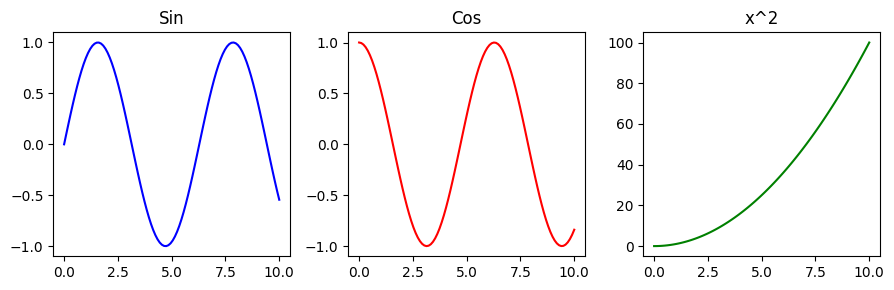

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2

fig, axs = plt.subplots(1, 3, figsize=(9, 3))  

axs[0].plot(x, y1, color='blue')
axs[0].set_title('Sin')

axs[1].plot(x, y2, color='red')
axs[1].set_title('Cos')

axs[2].plot(x, y3, color='green')
axs[2].set_title('x^2')

plt.tight_layout()

plt.show()

## Root Finder Methods

`deepchem.utils.differentiation_utils.optimize.rootfinder` provides a collection of algorithms for solving nonlinear equations. These methods are designed to find the roots of functions efficiently, making them indispensable for a wide range of applications in mathematics, physics, engineering, and other fields.

At its core, rootfinding seeks to determine the solutions (roots) of equations, where a function equals zero. This operation plays a pivotal role in numerous real-world applications, making it indispensable in both theoretical and practical domains.

### Broyden's First Method:

Broyden's First Method is an iterative numerical method used for solving systems of nonlinear equations. It's particularly useful when the Jacobian matrix (the matrix of partial derivatives of the equations) is difficult or expensive to compute. 

Broyden's Method is an extension of the Secant Method for systems of nonlinear equations. It iteratively updates an approximation to the Jacobian matrix using the information from previous iterations. The algorithm converges to the solution by updating the variables in the direction that minimizes the norm of the system of equations.

Steps:
1. Initialize the approximation to the Jacobian matrix.
$$J_{k}$$

2. Initialize the variables.
$$X_{k} = f(X_{k})$$

3. Compute the function values.
$$f_{k} = f(X_{k})$$

4. Update the variables.
$$X_{k+1} = X_{k+1} - J_{k}^{-1}f_k$$

5. Compute the change in variables.
$$\Delta X_{k+1} = X_{k+1} - X_{k}$$

6. Compute the function values.
$$f_{k+1} = f(X_{k+1})$$

7. Update the approximation to the Jacobian matrix.
$$J^{-1}_{k+1} = J^{-1}_{k} + \frac{(\Delta X_{k+1} - J^{-1}_{k} \Delta f_{k+1}) \Delta X^{T}_{k+1} J^{-1}_{k}}{\Delta X^{T}_{k+1} J^{-1}_{k} \Delta f_{k+1}}$$

8. Repeat steps 4-7 until convergence criteria are met.

#### References:

[1] "A class of methods for solving nonlinear simultaneous equations" by Charles G. Broyden

In [3]:
import torch
from deepchem.utils.differentiation_utils import rootfinder
def func1(y, A):
    return torch.tanh(A @ y + 0.1) + y / 2.0
A = torch.tensor([[1.1, 0.4], [0.3, 0.8]]).requires_grad_()
y0 = torch.zeros((2,1))

# Broyden's First Method
yroot = rootfinder(func1, y0, params=(A,), method='broyden1')
print("Root By Broyden's First Method:")
print(yroot)
print("Function Value at Calculated Root:")
print(func1(yroot, A))

Root By Broyden's First Method:
tensor([[-0.0459],
        [-0.0663]], grad_fn=<_RootFinderBackward>)
Function Value at Calculated Root:
tensor([[1.1735e-07],
        [1.7881e-07]], grad_fn=<AddBackward0>)


In [28]:
from deepchem.utils.differentiation_utils.optimize.rootsolver import broyden1
def fcn(x):
   return x**2 - 4 + torch.tan(x)
x0 = torch.tensor(0.0, requires_grad=True)
x = broyden1(fcn, x0)
x, fcn(x)

(tensor(2.2752, grad_fn=<ViewBackward0>),
 tensor(1.7881e-06, grad_fn=<AddBackward0>))

### Broyden's Second Method:

Broyden's Second Method differs from the first method in how it updates the approximation to the Jacobian matrix. Instead of using the change in variables and function values, it uses the change in the residuals (the difference between the function values and the target values) to update the Jacobian matrix. This approach can be more stable and robust in certain situations.

Steps:

1...6 are same as Broyden's First Method.

7. Update the approximation to the Jacobian matrix.
$$J^{-1}_{k+1} = J^{-1}_{k} + \frac{(\Delta X_{k+1} - J^{-1}_{k} \Delta f_{k+1}) \Delta f^{T}_{k+1}}{\Delta f^{T}_{k+1} \Delta f_{k+1}}$$

8. Repeat steps 4-7 until convergence criteria are met.


In [24]:
# Broyden's Second Method
import torch
from deepchem.utils.differentiation_utils import rootfinder
def func1(y, A):
    return torch.tanh(A @ y + 0.1) + y / 2.0
A = torch.tensor([[1.1, 0.4], [0.3, 0.8]]).requires_grad_()
y0 = torch.zeros((2,1))

yroot = rootfinder(func1, y0, params=(A,), method='broyden2')
print("\nRoot by Broyden's Second Method:")
print(yroot)
print("Function Value at Calculated Root:")
print(func1(yroot, A))


Root by Broyden's Second Method:
tensor([[-0.0459],
        [-0.0663]], grad_fn=<_RootFinderBackward>)
Function Value at Calculated Root:
tensor([[ 1.0300e-06],
        [-3.2783e-07]], grad_fn=<AddBackward0>)


## Equilibrium Methods (Fixed Point Iteration)

`deepchem.utils.differentiation_utils.optimize.equilibrium` contains algorithms for solving equilibrium problems, where the goal is to find a fixed point of a function. While all the rootfinding methods can be used to solve equilibrium problems, these specialized algorithms are designed to exploit the structure of equilibrium problems for more efficient convergence.

Equilibrium methods are essential in machine learning for optimizing models, ensuring stability and convergence, regularizing parameters, and analyzing strategic interactions in multi-agent systems. By leveraging equilibrium principles and techniques, machine learning practitioners can train more robust and generalizable models capable of addressing a wide range of real-world challenges.

### The Fixed-Point Problem:
Given the function $f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$, compute a fixed-point $x^{*} \in \mathbb{R}^{n}$ such that
$$x^{*} = f(x^{*})$$

### Classical Approach:
Steps:
1. Initialize the variables. $x_{k}$
2. Compute the function values. $f_{k} = f(x_{k})$
3. Update the variables. $x_{k+1} = f_{k}$
4. Repeat steps 2-3 until convergence criteria are met.

### Anderson Acceleration Approach (Anderson Mixing):
Anderson Acceleration is an iterative method for accelerating the convergence of fixed-point 
iterations. It combines information from previous iterations to construct a better approximation to 
the fixed-point. The algorithm uses a history of function values and updates to compute a new 
iterate that minimizes the residual norm.

Steps:
1. $\textbf{Initialize point: } x_{0}$, fixed-point mapping $f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$

2. $\textbf{for}$ $k = 0, 1,... $ $\textbf{do}$
   - Choose $m_{k}$ (e.g., $m_{k} = min(m, k)$  for some integer $m \geq 0$).
   - Select weights $\alpha_{k}^{j}$ based on the last $m_{k}$ iterations satisfying $\sum_{j=0}^{m_{k}} \alpha_{j}^{k} = 1$.
   - $x_{k+1} = \sum_{j=0}^{m_{k}} \alpha_{j}^{k}f(x_{k-m_{k}+j})$.
3. $\textbf{end}$ $\textbf{for}$

Root by Anderson Acceleration: 1.4142135381698608
Function Value at Calculated Root: 1.4142135381698608


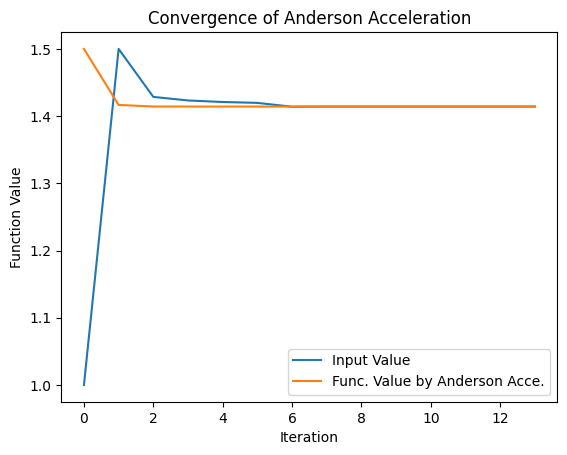

In [9]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.optimize.equilibrium import anderson_acc
x_value, f_value = [], []
def fcn(x, a):
    x_value.append(x.item())
    f_value.append((a/x + x).item()/2)
    return (a/x + x)/2
a = 2.0
x0 = torch.tensor([1.0], requires_grad=True)
x = anderson_acc(fcn, x0, params=[a], maxiter=16)
print("Root by Anderson Acceleration:", x.item())
print("Function Value at Calculated Root:", fcn(x, a).item())

# Plotting the convergence of Anderson Acceleration
plt.plot(x_value, label='Input Value')
plt.plot(f_value, label='Func. Value by Anderson Acce.')
plt.legend(loc='lower right')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Convergence of Anderson Acceleration')
plt.show()

## Minimizer

`deepchem.utils.differentiation_utils.optimize.minimizer` provides a collection of algorithms for minimizing functions. These methods are designed to find the minimum of a function efficiently, making them indispensable for a wide range of applications in mathematics, physics, engineering, and other fields.

Minimization algorithms, including variants of gradient descent like ADAM, are fundamental tools in various fields of science, engineering, and optimization.

### Gradient Descent

Gradient descent is a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function.

It is used to minimize the cost function in various machine learning and optimization problems. It iteratively updates the parameters in the direction of the negative gradient of the cost function.

Steps:

1. $\textbf{Initialize Parameters: }$ Denote the parameter vector to be optimized - $\theta$ and $\theta_0$ represent the initial guess.
    
2. $\textbf{Compute Gradient: }$ Calculate the gradient of the cost function $J(\theta)$ with respect to each parameter.

   $$\nabla J(\theta) = \left[ \frac{\partial J(\theta)}{\partial \theta_1}, \frac{\partial J(\theta)}{\partial \theta_2}, \ldots, \frac{\partial J(\theta)}{\partial \theta_n} \right]^T$$

   - $\textbf{Update Parameters: }$ Adjust the parameters in the opposite direction of the gradient to minimize the cost function according to the learning rate $\alpha$:

   $$\theta = \theta - \alpha \nabla J(\theta)$$
    
   - $\textbf{Repeat: }$ Steps 2 and 3 until the algorithm converges or Stops.

In [15]:
import torch
from deepchem.utils.differentiation_utils.optimize.minimizer import gd
def fcn(x):
    return 2 * x + (x - 2) ** 2, 2 * (x - 2) + 2
x0 = torch.tensor(0.0, requires_grad=True)
x = gd(fcn, x0, [])
print("Minimum by Gradient Descent:", x.item())
print("Function Value at Calculated Minimum:", fcn(x)[0].item())

Minimum by Gradient Descent: 0.9973406791687012
Function Value at Calculated Minimum: (tensor(3.0000), tensor(-0.0053))


### ADAM (Adaptive Moment Estimation)

ADAM is an optimization algorithm used for training deep learning models. It's an extension of the gradient descent optimization algorithm and combines the ideas of both momentum and RMSProp algorithms.

Steps:
1. $\textbf{Initialization: }$ ADAM initializes two moving average variables: $m$ (the first moment, similar to momentum) and $v$ (the second moment, similar to RMSProp).
    
2. $\textbf{Compute Gradients: }$ At each iteration of training, the gradients of the parameters concerning the loss function are computed.

3. $\textbf{Update Moving Averages: }$ The moving averages $m$ and $v$ are updated using exponential decay, with momentum and RMSProp components respectively:

$$m_{t} = \beta_{1} m_{t-1} + (1 - \beta_{1}) \nabla J(\theta_{t})$$
$$v_{t} = \beta_{2} v_{t-1} + (1 - \beta_{2}) (\nabla J(\theta_{t}))^2$$

4. $\textbf{Bias Correction: }$ Due to the initialization of the moving averages to zero vectors, there's a bias towards zero, especially during the initial iterations. To correct this bias, ADAM applies a bias correction step:

$$\hat{m}_{t} = \frac{m_{t}}{1 - \beta_{1}^t}$$
$$\hat{v}_{t} = \frac{v_{t}}{1 - \beta_{2}^t}$$

5. $\textbf{Update Parameters: }$ Finally, the parameters (weights and biases) of the model are updated using the moving averages and the learning rate $\alpha$:

$$\theta_{t+1} = \theta_{t} - \alpha \frac{\hat{m}_{t}}{\sqrt{\hat{v}_{t}} + \epsilon}$$

In [2]:
import torch
from deepchem.utils.differentiation_utils.optimize.minimizer import adam
def fcn(x):
    return 2 * x + (x - 2) ** 2, 2 * (x - 2) + 2
x0 = torch.tensor(10.0, requires_grad=True)
x = adam(fcn, x0, [], maxiter=20000)
print("X at Minimum by Adam:", x.item())
print("Function Value at Calculated Minimum:", fcn(x)[0].item())

X at Minimum by Adam: 1.0067708492279053
Function Value at Calculated Minimum: 3.0000457763671875


## Conclusion

Differentiable optimization techniques are essential for many advanced computational experiments involving Environment Simulations like DFT, Physics Informed Neural Networks and as fundamental mathematical foundation for Molecular Simulation like Monte Carlo and Molecular Dynamics.

By integrating deep learning into simulations, we optimize efficiency and accuracy by leveraging trainable neural networks to replace costly or less precise components. This advancement holds immense potential for expediting scientific advancements and addressing longstanding mysteries with greater efficacy.

## References

[1] Raissi M, Perdikaris P, Karniadakis GE. Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations. Journal of Computational physics (2019)

[2] Muhammad F. Kasim, Sam M. Vinko. Learning the exchange-correlation functional from nature with fully differentiable density functional theory. 2021 American Physical Society

[3] Nathan Argaman, Guy Makov. Density Functional Theory -- an introduction. American Journal of Physics 68 (2000), 69-79

[4] John Ingraham et al. Learning Protein Structure with a Differentiable Simulator. ICLR.
2019.

## Citing This Tutorial

If you found this tutorial useful please consider citing it using the provided BibTeX.

```bibtex
@manual{Quantum Chemistry, 
 title={Differentiation Infrastructure in Deepchem}, 
 organization={DeepChem},
 author={Singh, Rakshit kr.},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Differentiation_Infrastructure_in_Deepchem.ipynb}}, 
 year={2024}, 
} 
```

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/SxSzjRRDMA) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!